In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AI ML With Python Complete/22-Deep Learning/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# pd.set_option("display.float", "{:.2f}".format)
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [ ]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# EDA

In [ ]:
# total fraud class
fraud = df[df['Class']==1]
print('Fraud Transactions: {}'.format(len(fraud)))

Fraud Transactions: 492


In [ ]:
# total normal class
normal = df[df['Class']==0]
print('Valid Transactions: {}'.format(len(normal)))

Valid Transactions: 284315


In [ ]:
pd.concat([fraud.Amount.describe(), normal.Amount.describe()], axis=1)

,Amount,Amount
count,492.000000,284315.000000
mean,122.211321,88.291022
std,256.683288,250.105092
min,0.000000,0.000000
25%,1.000000,5.650000
50%,9.250000,22.000000
75%,105.890000,77.050000
max,2125.870000,25691.160000


In [ ]:
pd.concat([fraud.Time.describe(), normal.Time.describe()], axis=1)

,Time,Time
count,492.000000,284315.000000
mean,80746.806911,94838.202258
std,47835.365138,47484.015786
min,406.000000,0.000000
25%,41241.500000,54230.000000
50%,75568.500000,84711.000000
75%,128483.000000,139333.000000
max,170348.000000,172792.000000


In [ ]:
LABELS = ["Normal", "Fraud"]

<ipython-input-64-819e165cda3e>:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_classes = pd.value_counts(df['Class'], sort = True)


,count
Class,
0,284315
1,492


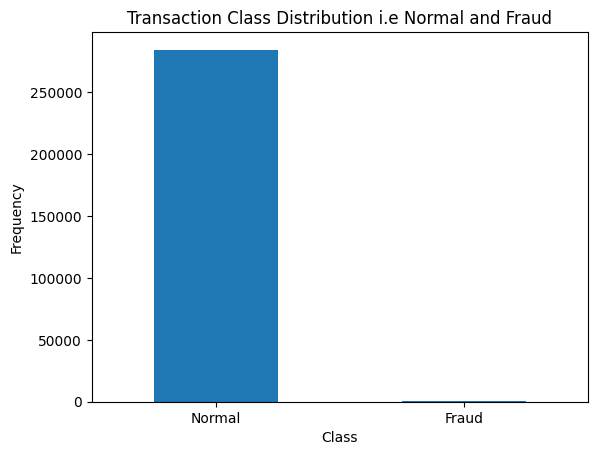

In [ ]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution i.e Normal and Fraud")
plt.xticks(range(2), LABELS)
plt.xlabel("Class")
plt.ylabel("Frequency")
df.Class.value_counts()

In [ ]:
# Find outlier friction

outlierFraction = len(fraud)/float(len(normal))
print(outlierFraction)

0.0017304750013189597


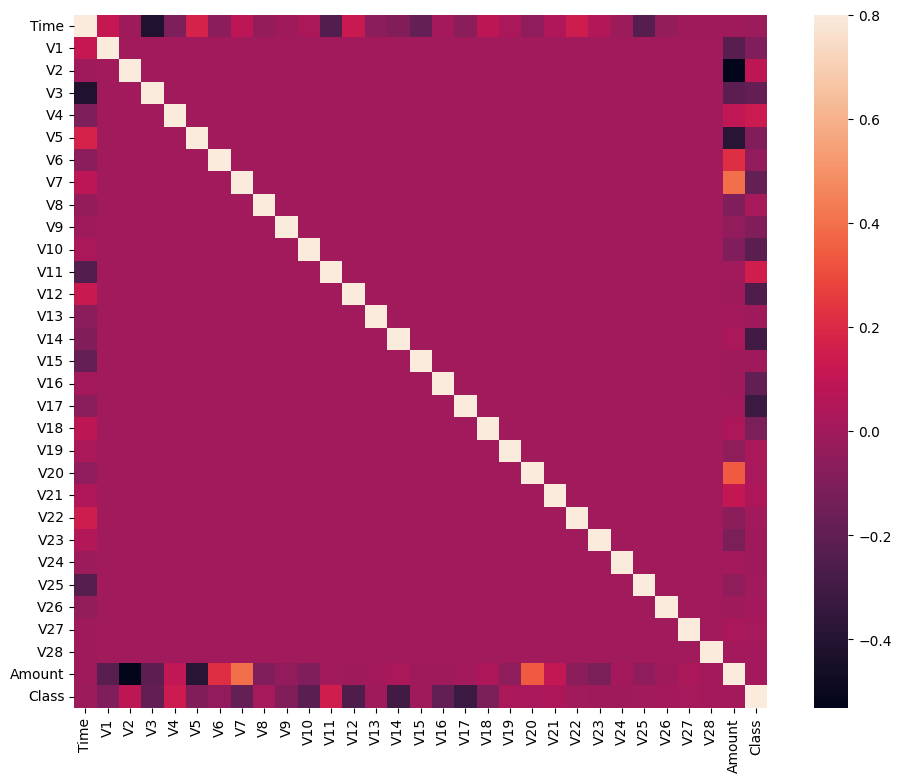

In [ ]:
#plotting the correlation matrix
corrmat = df.corr()
fig = plt.figure(figsize = (12, 9))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

# Data Pre-processing

In [ ]:
#separating the X and the Y values
x = df.drop(['Class'], axis = 1)
# xData = X.values
# xData

In [ ]:
x

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [ ]:
y = df["Class"]
# yData = Y.values
# yData

In [ ]:
y

,Class
0,0
1,0
2,0
3,0
4,0
...,...
284802,0
284803,0
284804,0
284805,0


In [ ]:
#training and testing data bifurcation
from sklearn.model_selection import train_test_split
#split the data into training and testing sets
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size = 0.2, random_state =0)

In [ ]:
xTrain

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
68806,53150.0,-1.115047,1.035583,0.800712,-1.060398,0.032621,0.853422,-0.614243,-3.231161,1.539948,...,-0.644896,3.020385,-0.539618,0.033156,-0.774946,0.105868,-0.430853,0.229737,-0.070591,12.95
40018,40060.0,1.228473,-0.138826,0.473795,-0.166381,-0.453564,-0.190135,-0.355309,0.048598,0.128943,...,0.032481,-0.172147,-0.574730,0.036834,-0.303782,0.073315,0.810356,-0.069178,0.001890,25.57
250360,154865.0,1.926148,-0.198628,-0.286727,1.596852,-0.488963,-0.311405,-0.303207,0.035513,1.301312,...,-0.355216,-0.528432,-1.251300,0.455607,-0.120530,-0.361515,-1.099295,0.052747,-0.032622,6.90
234820,148130.0,2.046232,0.196183,-1.704650,0.530027,0.177496,-1.443091,0.255403,-0.365759,0.602945,...,-0.216247,0.201104,0.757245,-0.013600,-0.079318,0.234805,-0.098151,0.000028,-0.031675,4.55
10001,15014.0,-0.837077,1.034710,2.333129,3.103776,0.229143,0.501123,0.314283,-0.161583,0.409634,...,-0.134542,-0.363839,-0.458101,0.164097,0.234167,-0.418734,-0.074078,-0.355165,-0.169616,3.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211543,138459.0,-1.321976,1.138686,-0.940861,0.154160,0.109802,-0.538822,0.490058,0.513762,-0.493834,...,-0.436962,-0.012778,-0.237503,0.008713,-0.767844,-0.397162,0.316379,-0.463125,-0.010589,49.89
86293,61167.0,-0.627810,0.918729,1.478453,0.213171,0.933695,1.261486,0.504752,0.404286,-0.939740,...,0.088281,-0.051356,-0.004245,0.090535,-0.964599,-0.522294,0.296733,0.145939,0.110400,24.99
122579,76616.0,1.512602,-0.949435,-0.219062,-1.638850,-0.856348,-0.465996,-0.669193,-0.135566,-2.284345,...,-0.279028,-0.558803,-1.377240,0.080444,-0.579511,0.297851,-0.495367,-0.001415,0.003665,34.90
152315,97253.0,1.798863,-1.699791,-0.142182,-0.619533,-1.570248,0.083268,-1.501980,0.176287,1.755507,...,0.146098,0.181914,0.351358,0.115638,-0.566188,-0.596200,-0.295152,-0.033616,-0.032471,171.31


In [ ]:
print(f"TRAINING: xTrain: {xTrain.shape}, yTrain: {yTrain.shape}\n{'_'*50}")
print(f"\nTESTING: xTest: {xTest.shape}, yTest: {yTest.shape}")

TRAINING: xTrain: (227845, 30), yTrain: (227845,)
__________________________________________________

TESTING: xTest: (56962, 30), yTest: (56962,)


# Logistic Regression

In [ ]:
# Building logistic regression
from sklearn.linear_model import LogisticRegression

In [ ]:
logistic = LogisticRegression()

In [ ]:
logistic.fit(xTrain,yTrain)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
log_pred=logistic.predict(xTest)
log_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [ ]:
results=confusion_matrix(yTest,log_pred)
print('confusion matrix\n','_'*50,"\n")
print(results)
print("\nThe model used is Logistc Regression\n",'_'*50,"\n")

acc = accuracy_score(yTest,log_pred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest,log_pred)
print("The precision is {}".format(prec))

f1 = f1_score(yTest,log_pred)
print("The F1-Score is {}".format(f1))

confusion matrix
 __________________________________________________ 

[[56834    27]
 [   30    71]]

The model used is Logistc Regression
 __________________________________________________ 

The accuracy is 0.9989993328885924
The precision is 0.7244897959183674
The F1-Score is 0.7135678391959799


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
cls=DecisionTreeClassifier(criterion='entropy',random_state=0)

In [ ]:
cls.fit(xTrain,yTrain)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
dt_pred=cls.predict(xTest)
dt_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [ ]:
results=confusion_matrix(yTest,dt_pred)
print('confusion matrix\n','_'*50,"\n")
print(results)
print("\nThe model used is Decision Tree\n",'_'*50,"\n")

acc = accuracy_score(yTest,dt_pred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest,dt_pred)
print("The precision is {}".format(prec))

f1 = f1_score(yTest,dt_pred)
print("The F1-Score is {}".format(f1))

confusion matrix
 __________________________________________________ 

[[56836    25]
 [   23    78]]

The model used is Decision Tree
 __________________________________________________ 

The accuracy is 0.9991573329588147
The precision is 0.7572815533980582
The F1-Score is 0.7647058823529412


In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

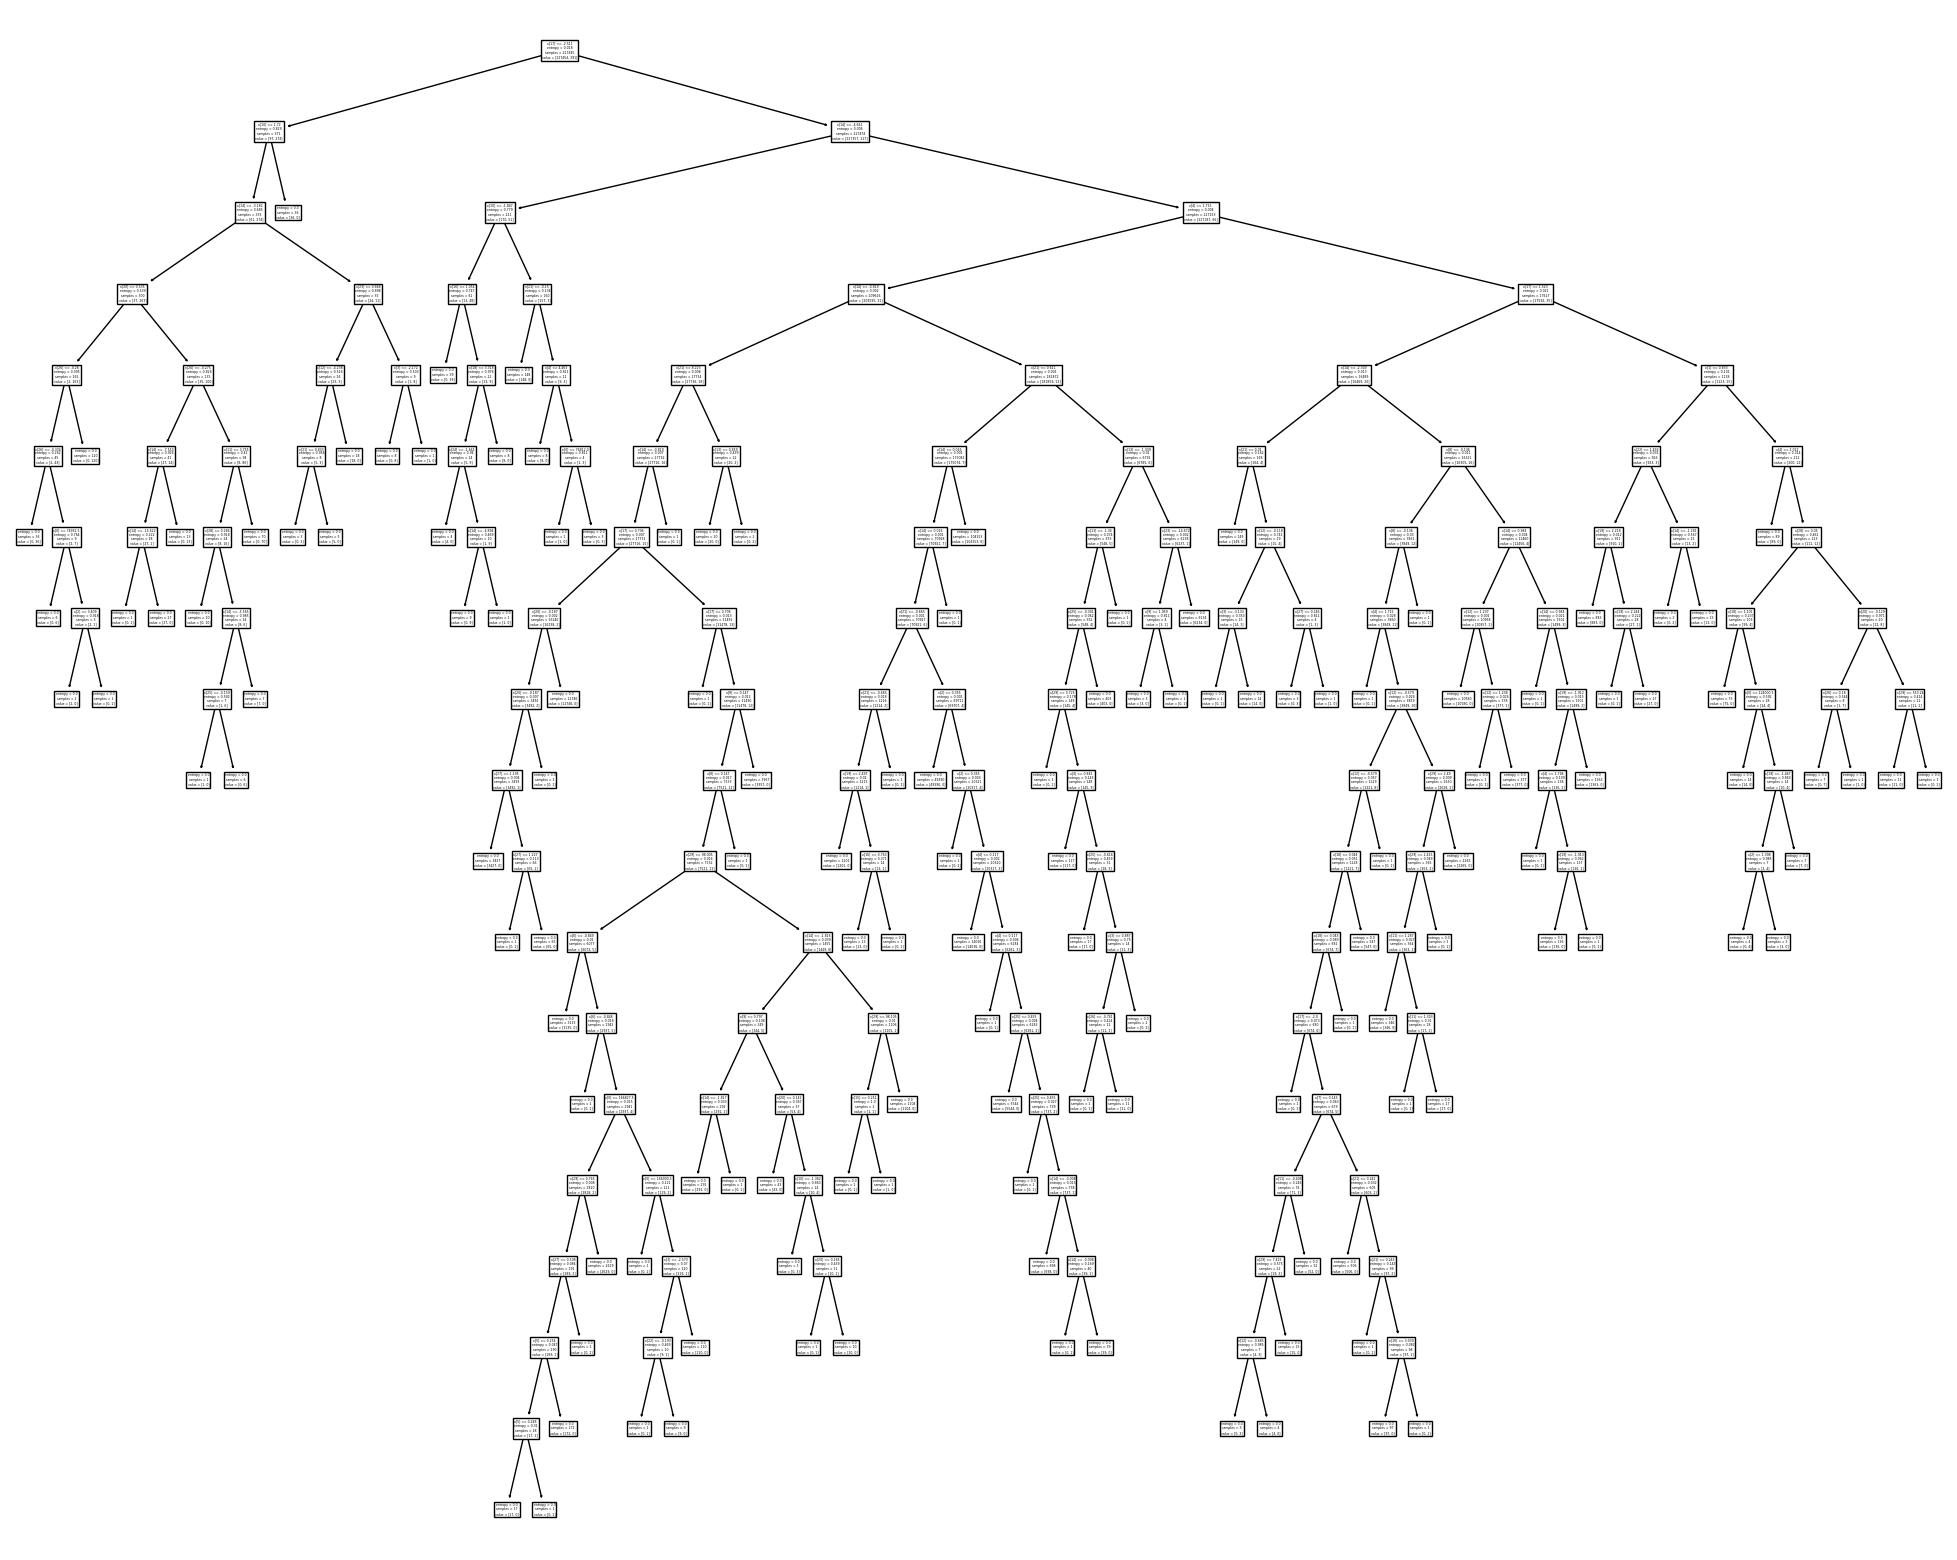

In [ ]:
fig=plt.figure(figsize=(25,20))
k=tree.plot_tree(cls)

# Random Forest

In [ ]:
# building the Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#random forest model creation
rfc=RandomForestClassifier(n_estimators=300,criterion='entropy',random_state=0)

In [ ]:
rfc.fit(xTrain,yTrain)

RandomForestClassifier(criterion='entropy', n_estimators=300, random_state=0)

In [ ]:
estimator = rfc.estimators_[0]

In [ ]:
#predictions
rt_pred=rfc.predict(xTest)
rt_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#building all kinds of evaluating parameters
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [ ]:
results=confusion_matrix(yTest,rt_pred)
print('confusion matrix\n','_'*50,"\n")
print(results)
print("\nThe model used is Random Forest Tree\n",'_'*50,"\n")

acc = accuracy_score(yTest,rt_pred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest,rt_pred)
print("The precision is {}".format(prec))

f1 = f1_score(yTest,rt_pred)
print("The F1-Score is {}".format(f1))

confusion matrix
 __________________________________________________ 

[[56855     6]
 [   21    80]]

The model used is Random Forest Tree
 __________________________________________________ 

The accuracy is 0.9995259997893332
The precision is 0.9302325581395349
The F1-Score is 0.855614973262032


In [ ]:
import matplotlib.pyplot as plt
from sklearn import tree

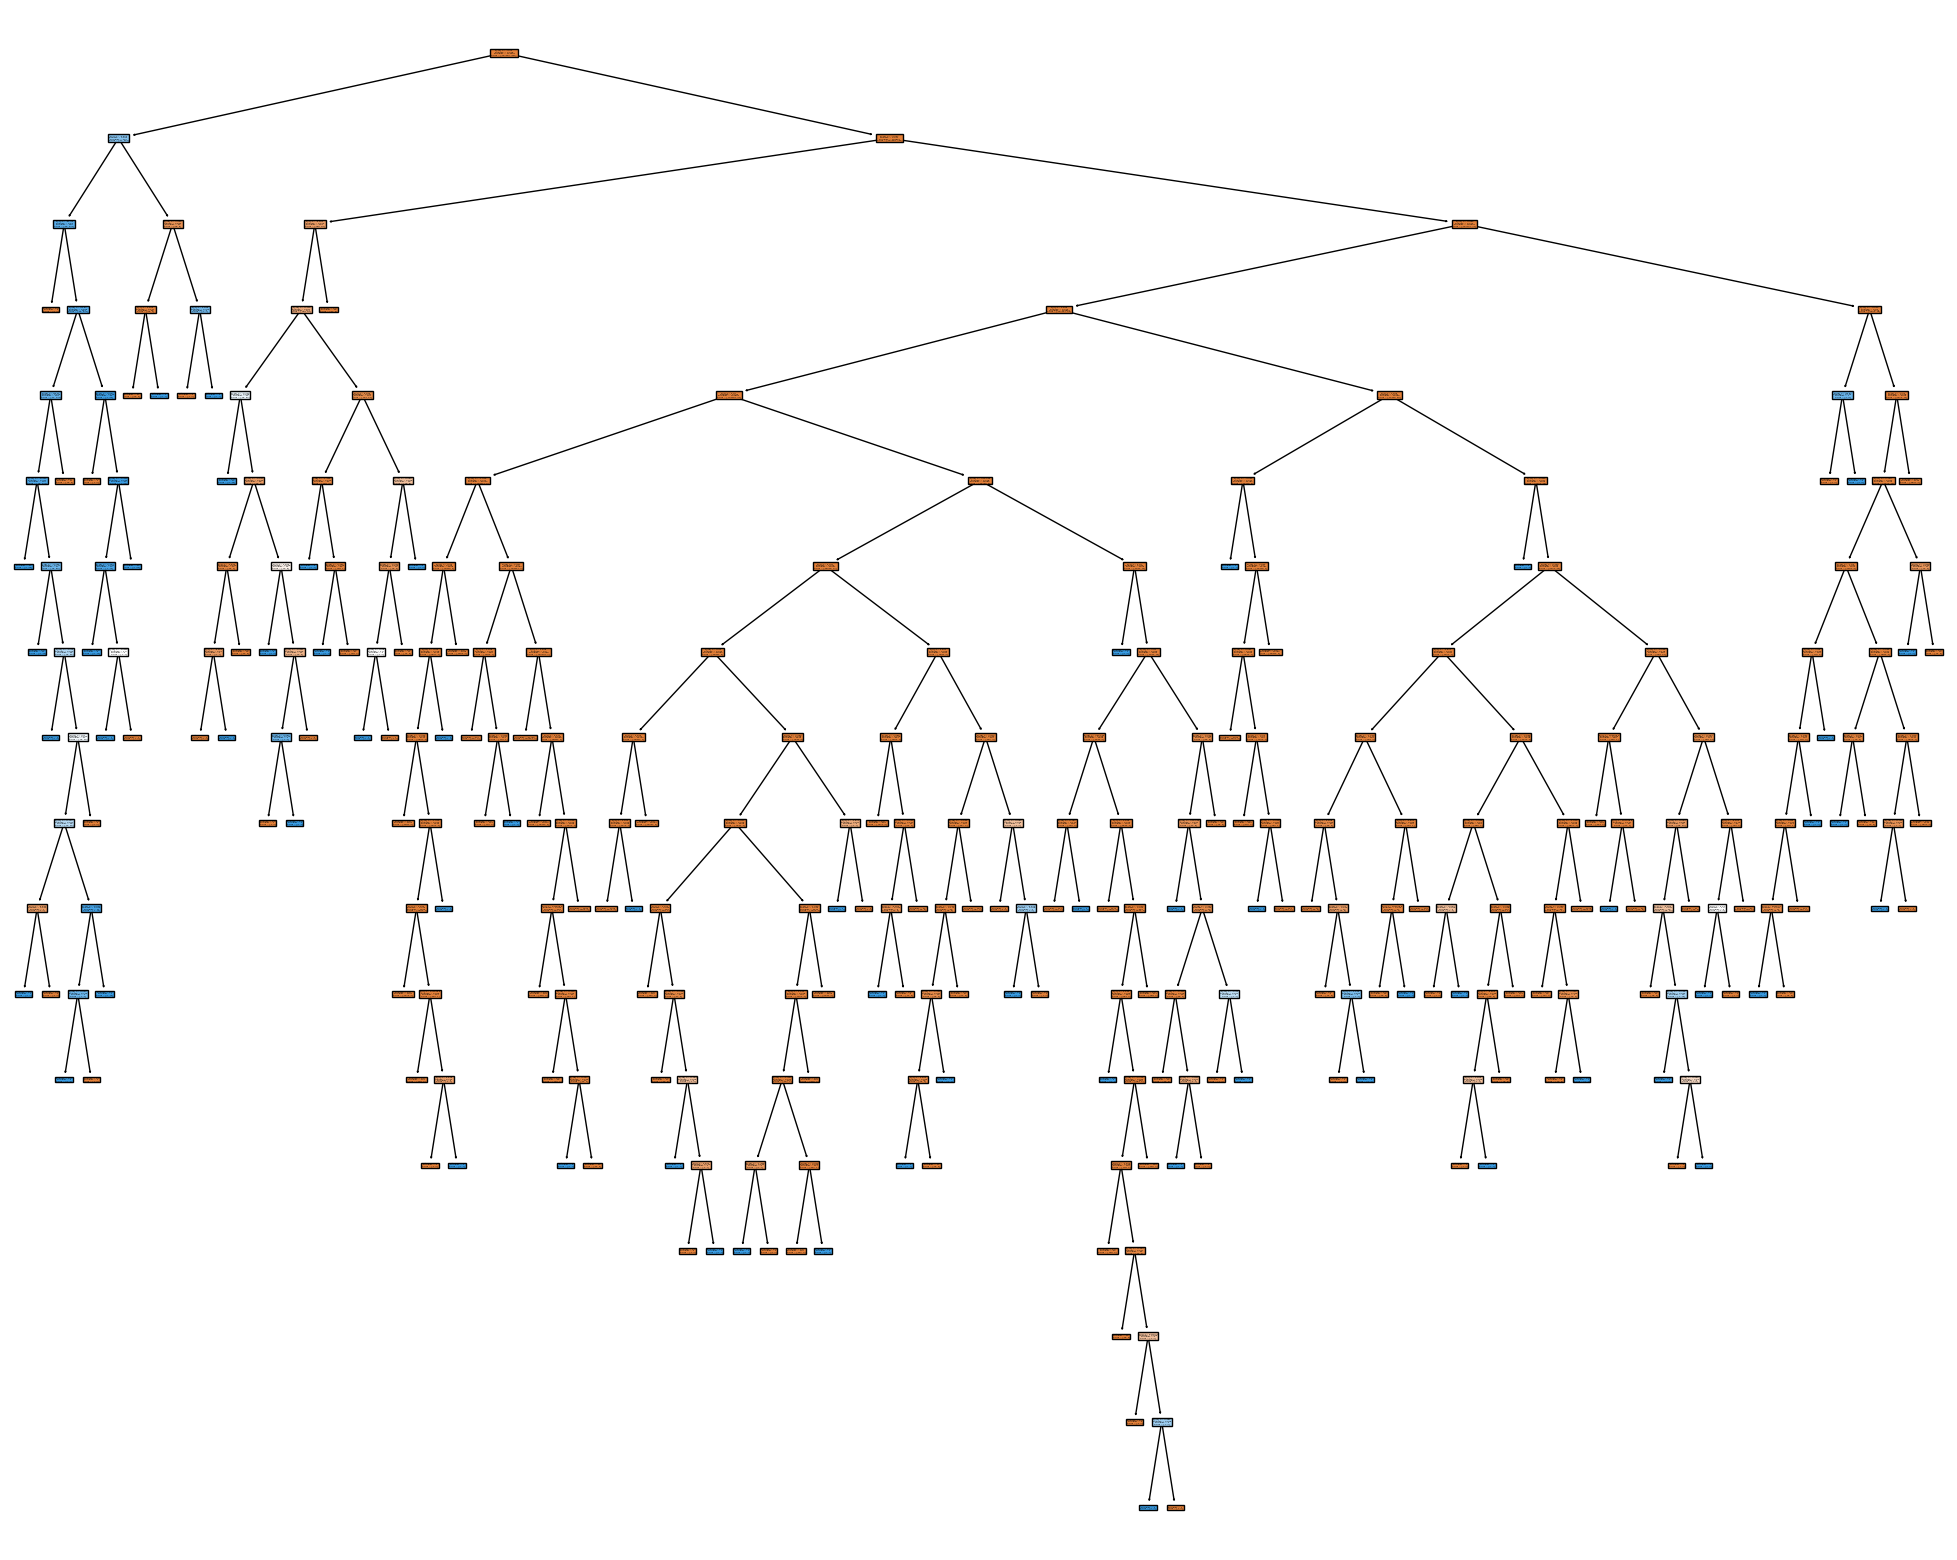

In [ ]:
fig = plt.figure(figsize=(25, 20))
k= tree.plot_tree(estimator, filled=True)
plt.show()

# KNN Algorithm

In [ ]:
# Initialize the k-NN classifier with k=3 (you can change k)
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)

In [ ]:
# Fit the classifier to the training data
knn.fit(xTrain,yTrain)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
#predictions
knn_pred = knn.predict(xTest)
knn_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
#building all kinds of evaluating parameters
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [ ]:
results=confusion_matrix(yTest,knn_pred)
print('confusion matrix\n','_'*50,"\n")
print(results)
print("\nThe model used is Random Forest Tree\n",'_'*50,"\n")

acc = accuracy_score(yTest,knn_pred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest,knn_pred)
print("The precision is {}".format(prec))

f1 = f1_score(yTest,knn_pred)
print("The F1-Score is {}".format(f1))

confusion matrix
 __________________________________________________ 

[[56859     2]
 [   93     8]]

The model used is Random Forest Tree
 __________________________________________________ 

The accuracy is 0.9983322214809873
The precision is 0.8
The F1-Score is 0.14414414414414414


# ANN

In [ ]:
# pip install keras
# pip install tensorflow
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

In [ ]:
classifier=Sequential()

In [ ]:
# classifier.add(Dense(output_dim=16, init='uniform', activation='relu',input_dim=30))
# classifier.add(Dropout(p=0.1))

classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu', input_dim=30))
classifier.add(Dropout(rate=0.1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# classifier.add(Dense(output_dim=16, init='uniform', activation='relu'))
# classifier.add(Dropout(p=0.1))

classifier.add(Dense(units=16, kernel_initializer='uniform', activation='relu'))
classifier.add(Dropout(rate=0.1))

In [ ]:
# classifier.add(Dense(output_dim=16, init='uniform', activation='sigmoid'))

classifier.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

In [ ]:
# classifier.compile(optmizer="Adam",loss="binary_crossentropy",metrices=['accuracy'])

classifier.compile(optimizer="Adam", loss="binary_crossentropy", metrics=['accuracy'])

In [ ]:
# classifier.fit(xTrain,yTrain,batch_size=100,nb_epoch=150)

classifier.fit(xTrain, yTrain, batch_size=100, epochs=150)

Epoch 1/150
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9875 - loss: 0.0973
Epoch 2/150
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9982 - loss: 0.0273
Epoch 3/150
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9983 - loss: 0.0168
Epoch 4/150
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9984 - loss: 0.0123
Epoch 5/150
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9983 - loss: 0.0130
Epoch 6/150
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9983 - loss: 0.0132
Epoch 7/150
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9981 - loss: 0.0150
Epoch 8/150
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9983 - loss: 0.0146
Epoch 9/150
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9984 - loss: 0.0124
Epoch 10/150
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9983 - loss: 0.0127
Epoch 11/150
2279/2279 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9982 - loss: 0.0132
Epoch 12/150
2279/2

In [ ]:
# Ann_pred=classifier.predict(xTest)

Ann_pred=classifier.predict(xTest)
Ann_pred

1781/1781 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step


array([[0.00171706],
       [0.00171706],
       [0.00171706],
       ...,
       [0.00171706],
       [0.00171706],
       [0.00171706]], dtype=float32)

In [ ]:
Ann_pred=(Ann_pred>0.5)
Ann_pred

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [ ]:
results=confusion_matrix(yTest,Ann_pred)
print('confusion matrix\n','_'*50,"\n")
print(results)
print("\nThe model used is ANN_models\n",'_'*50,"\n")

acc = accuracy_score(yTest,Ann_pred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest,Ann_pred)
print("The precision is {}".format(prec))

f1 = f1_score(yTest,Ann_pred)
print("The F1-Score is {}".format(f1))

confusion matrix
 __________________________________________________ 

[[56861     0]
 [  101     0]]

The model used is ANN_models
 __________________________________________________ 

The accuracy is 0.9982268881008391
The precision is 0.0
The F1-Score is 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
